In [3]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "/usr/lib/python3.10/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = parse_requirement(requirement_string)
        File "/usr/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/usr/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "/usr/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parse

In [4]:
#checking whether the installation is rightly done or not
!pip list

Package                      Version
---------------------------- -----------------
absl-py                      1.4.0
aiofiles                     22.1.0
aiosqlite                    0.18.0
anyio                        3.6.2
apparmor                     3.1.3
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asgiref                      3.5.2
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
autopep8                     2.0.2
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.0
bleach                       6.0.0
Brlapi                       0.8.4
btrfsutil                    6.2.2
cachetools                   5.3.0
catfish                      4.16.4
cffi                         1.15.1
chardet                      5.1.0
click                        8.1.3
comm                         0.1.2
contourpy                    1.0

In [5]:
pip install tensorflow-gpu


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "/usr/lib/python3.10/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = parse_requirement(requirement_string)
        File "/usr/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/usr/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "/usr/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parse

In [21]:
#import some of the dependencies
import tensorflow as tf
#os is used to navigate through the file structures
import os
os.path.join('data','happy')

2023-04-30 12:19:16.693564: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-30 12:19:16.834977: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-30 12:19:16.970599: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-30 12:19:16.971362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 12:19:17.946032: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

'data/happy'

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [20]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [19]:
len(gpus)

1

1.2 now removing the dodgy images

In [143]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [144]:
import os
data_dir = 'data'
os.listdir(os.path.join(data_dir,'happy'))
os.listdir??

Signature: os.listdir(path=None)
Docstring:
Return a list containing the names of the files in the directory.

path can be specified as either str, bytes, or a path-like object.  If path is bytes,
  the filenames returned will also be bytes; in all other circumstances
  the filenames returned will be str.
If path is None, uses the path='.'.
On some platforms, path may also be specified as an open file descriptor;\
  the file descriptor must refer to a directory.
  If this functionality is unavailable, using it raises NotImplementedError.

The list is in arbitrary order.  It does not include the special
entries '.' and '..' even if they are present in the directory.
Type:      builtin_function_or_method

In [145]:
image_exts = ['jpeg','jpg','bmp','png']
image_exts

['jpeg', 'jpg', 'bmp', 'png']

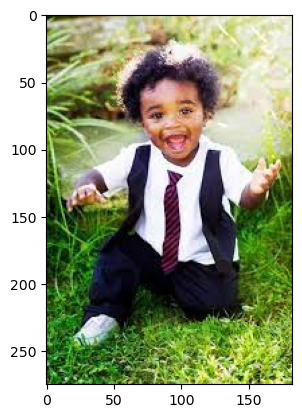

In [147]:
import cv2
img = cv2.imread(os.path.join('data','happy','image16.jpeg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [149]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        # finds the image through the directory
        image_path = os.path.join(data_dir , image_class, image)
        
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in exts{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
                      print('Issue with the Image {}'.format(image_path))

In [154]:
tf.data.Dataset??


Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [155]:
import numpy as np
from matplotlib import pyplot as plt

In [156]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [157]:
#it loads the data in the system  
data = tf.keras.utils.image_dataset_from_directory('data')     

Found 169 files belonging to 2 classes.


In [158]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [160]:
data_iterator = data.as_numpy_iterator()

In [161]:
data_iterator

In [162]:
batch = data_iterator.next()
batch[0]

array([[[[255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         ...,
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ]],

        [[255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         ...,
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ]],

        [[255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         ...,
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ]],

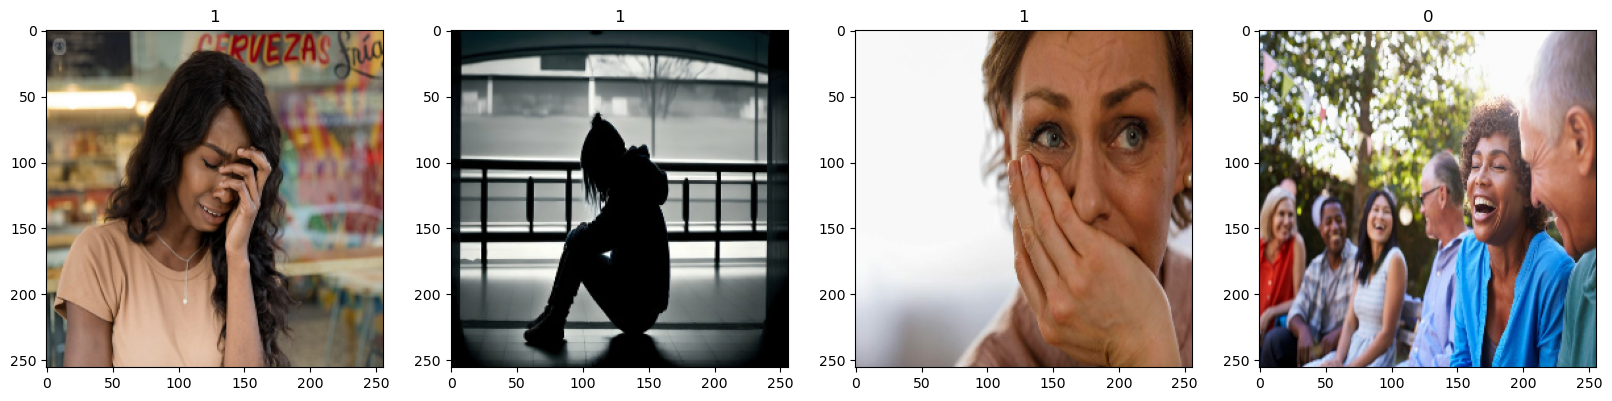

In [111]:
fig , ax = plt.subplots(ncols = 4 , figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

In [112]:
#contains the images whose RGB value ranges from 0 to 255
batch[0]

array([[[[ 66.4436  ,  57.972412,  48.192383],
         [ 69.36719 ,  62.628662,  52.042725],
         [ 73.254395,  66.9436  ,  55.40454 ],
         ...,
         [203.28125 , 162.28125 ,  82.5625  ],
         [200.86719 , 160.42969 ,  81.75049 ],
         [199.53784 , 158.38159 ,  82.10034 ]],

        [[ 38.21045 ,  33.3396  ,  29.55835 ],
         [ 47.029785,  42.6438  ,  37.58911 ],
         [ 51.710938,  47.729248,  41.721436],
         ...,
         [204.323   , 165.0105  ,  86.0105  ],
         [200.27344 , 162.96094 ,  84.98291 ],
         [199.32031 , 160.32031 ,  83.32031 ]],

        [[ 35.097168,  33.931396,  36.092773],
         [ 45.29956 ,  41.29956 ,  39.440186],
         [ 53.188232,  48.960938,  45.733643],
         ...,
         [204.38281 , 165.38281 ,  88.38281 ],
         [202.0105  , 164.0105  ,  89.35962 ],
         [201.1936  , 162.1936  ,  85.1936  ]],

        ...,

        [[ 60.382812,  73.14673 ,  73.71265 ],
         [ 65.59375 ,  77.02344 ,  78.16406 ]

In [163]:
 #reducing the size of the image within the 1
batch[0]/255

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [164]:
#contains the
batch[1]

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

2. Processing the data
data pipeline: steos that are applied to the raw input data to transform into the format that can be used for training the model

        2.1 Scale the data

In [165]:
data = data.map(lambda x,y:( x/255, y))

In [167]:
scaled_iterator = data.as_numpy_iterator()



In [168]:
batch = scaled_iterator.next()


In [172]:
batch[0].max()

1.0

In [170]:
batch[0].min()

0.0

2.2 Split the data into training and testing set

In [173]:
len( data)

6

In [175]:
6*0.6

3.5999999999999996

In [184]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.2)#needed only at the end of the process while testing

In [185]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

 3.Deep Model

3.1 Build deep learning model

In [186]:
#importing the set of dependencies from the tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [187]:
model = Sequential()

In [188]:
#performing convolution and maxpooling 16(filters) 3,3( size of the filters) 1(stride)
model.add(Conv2D(16,(3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

#layer 2:
model.add(Conv2D(32,(3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
#layer 3:
model.add(Conv2D(16,(3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
#nakes into 1D array
model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [189]:
model.compile('adam', loss =tf.losses.BinaryCrossentropy(), metrics = ['accuracy']) 

In [190]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

3.2 Train model

In [191]:
logdir = 'logs'

In [192]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [193]:
hist = model.fit(train, epochs =20, validation_data = val, callbacks =[tensorboard_callback])

Epoch 1/20


2023-04-30 23:33:16.320773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [169]
	 [[{{node Placeholder/_0}}]]
2023-04-30 23:33:16.321597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [169]
	 [[{{node Placeholder/_4}}]]


4/4 [==============================] - ETA: 0s - loss: 0.9992 - accuracy: 0.5078

2023-04-30 23:33:21.541259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [169]
	 [[{{node Placeholder/_4}}]]
2023-04-30 23:33:21.541944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [169]
	 [[{{node Placeholder/_4}}]]


4/4 [==============================] - 7s 843ms/step - loss: 0.9992 - accuracy: 0.5078 - val_loss: 0.6519 - val_accuracy: 0.5625
Epoch 2/20
4/4 [==============================] - 5s 817ms/step - loss: 0.6518 - accuracy: 0.5234 - val_loss: 0.6310 - val_accuracy: 0.6250
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.6447 - accuracy: 0.5938 - val_loss: 0.6440 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 5s 951ms/step - loss: 0.5937 - accuracy: 0.7188 - val_loss: 0.6222 - val_accuracy: 0.7188
Epoch 5/20
4/4 [==============================] - 5s 845ms/step - loss: 0.5362 - accuracy: 0.8047 - val_loss: 0.5441 - val_accuracy: 0.8125
Epoch 6/20
4/4 [==============================] - 5s 969ms/step - loss: 0.4490 - accuracy: 0.8203 - val_loss: 0.3629 - val_accuracy: 0.9062
Epoch 7/20
4/4 [==============================] - 5s 907ms/step - loss: 0.3466 - accuracy: 0.8594 - val_loss: 0.2902 - val_accuracy: 0.9062
Epoch 8/20
4/4 [==================

3.3 Plot  the performance

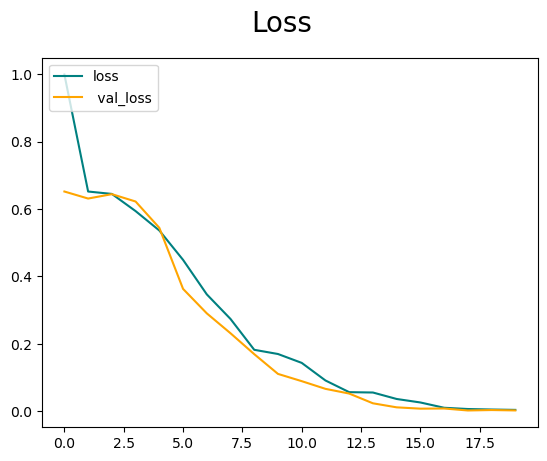

In [194]:
fig = plt.figure()
plt.plot(hist.history['loss'], color ='teal', label='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label= ' val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc ='upper left')
plt.show()

4. Evaluation

In [195]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [196]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [197]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

2023-04-30 23:50:33.988972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [169]
	 [[{{node Placeholder/_4}}]]
2023-04-30 23:50:33.990247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [169]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 1s 813ms/step


In [202]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0,Accuracy:1.0


Testing the model

In [203]:
import cv2

In [228]:
def testing(image_path):
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #plt.show()
    resize = tf.image.resize(img,(256,256))
    plt.imshow(resize.numpy().astype(int))
    #plt.show()
    yhat = model.predict(np.expand_dims(resize/255,0))
    return yhat    

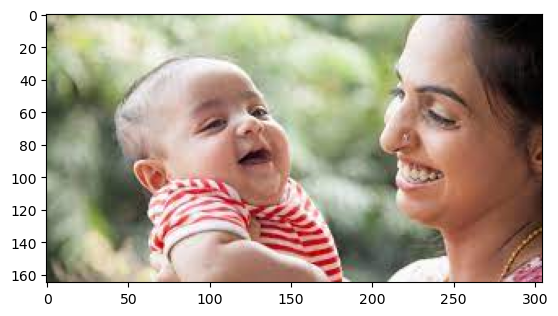

In [206]:
# img = cv2.imread("happy.jpeg")
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()

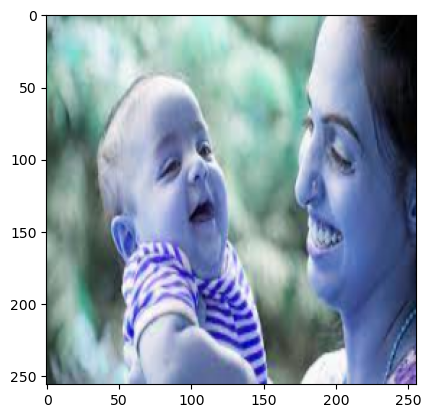

In [209]:
# resize = tf.image.resize(img,(256,256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()

In [211]:
# we are giving the pic to the model where array of different dems are made into 1
#values are made from 0 to 1
# yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 40ms/step


In [212]:
# yhat

array([[0.24641824]], dtype=float32)

1/1 [==============================] - 0s 38ms/step


array([[0.9846493]], dtype=float32)

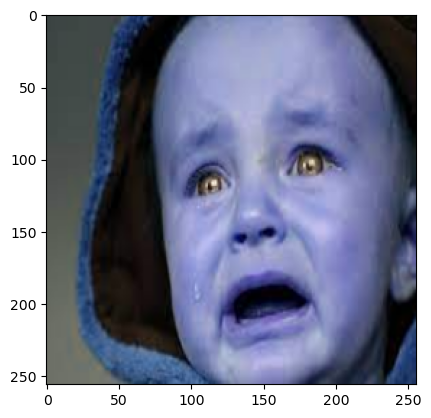

In [229]:
yhat = testing("sed.jpeg")
yhat

In [231]:
if yhat < 0.5:
    print("Image you have entered is feeling happy")
else:
    print("Image you have entered is feeling low, Help them :-(")

Image you have entered is feeling low, Help them :-(


Saving the model

In [6]:
from tensorflow.keras.models import load_model

In [7]:
model.save(os.path.join('models','feelings.h5'))

NameError: name 'model' is not defined

In [5]:
new_model = load_model(os.path.join('models','feelings.h5'))

NameError: name 'os' is not defined

AttributeError: 'Sequential' object has no attribute 'testing'

In [235]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 105ms/step


array([[0.24641824]], dtype=float32)